In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [134]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [135]:
df.shape

(271116, 15)

In [136]:
# Taking only summer season
df=df[df['Season']=='Summer'] 

In [137]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [138]:
# NOC = Country name with second dataset
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [139]:
df=df.merge(region_df,on='NOC',how='left')

In [140]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [141]:
#No.of countries partcipating
df['region'].unique().shape 

(206,)

In [142]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [143]:
# Check missing value
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [144]:
#Check duplicated rows or not
df.duplicated().sum()

1385

In [146]:
#dropping duplicated values
df.drop_duplicates(inplace=True) 

In [147]:
df.duplicated().sum()

0

In [148]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [150]:
 # One hot encode (diff column for all medal)
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
222547,False,False,False
222548,False,False,False
222549,False,False,False
222550,False,False,False


In [152]:
pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,False,False,False
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,False,False,False
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,False,False,False


In [153]:
# New Data Frame
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [154]:
# Groupby on NOC 
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [155]:
#counting medal as 1 instead of medal given to each individual
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [156]:
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,False,False,True
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,True,False,False
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,False,False,False
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,False,False,False


In [157]:
medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [158]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [159]:
# new colum total 
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [160]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [161]:
years = df['Year'].unique().tolist()

In [162]:
years.sort()

In [163]:
years.insert(0,'Overall')

In [164]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [165]:
country = np.unique(df['region'].dropna().values).tolist()

In [166]:
country.sort()

In [167]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [168]:
country.insert(0,'Overall')

In [169]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [33]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [170]:
# Function
def fetch_medal_tally(year,country):
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == 2016) & (medal_df['region']== country)]
    if flag ==1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [171]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
fetch_medal_tally(year='Overall',country='India')

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [172]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,False,False,False
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,False,False,False
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,False,False,False
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,False,False,False
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,False,False,False
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,False,False,False
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,False,False,False
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,False,False,False


In [173]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False


# Overall Analysis
Number of editions
, Number of cities
, Event/Sports/Atheltes/Nations

In [174]:

df['Year'].unique().shape[0] -1

28

In [175]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [176]:
df['Sport'].unique().shape

(52,)

In [177]:
df['Event'].unique().shape

(651,)

In [178]:
df['Name'].unique().shape

(116122,)

In [179]:
df['region'].unique().shape

(206,)

In [180]:
#Participating Nations Over Time
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [181]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index()

In [182]:
nations_over_time.rename(columns={'index': 'Edition', 'Year': 'No of Countries'}, inplace=True)

In [183]:
print(nations_over_time.head())
print(nations_over_time.columns)

   No of Countries  count
0             2016    204
1             2012    203
2             2008    202
3             2004    200
4             2000    199
Index(['No of Countries', 'count'], dtype='object')


In [184]:
import plotly.express as px

In [185]:
fig = px.line(nations_over_time, x="count", y="No of Countries")
fig.show()


In [186]:
x = df 

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

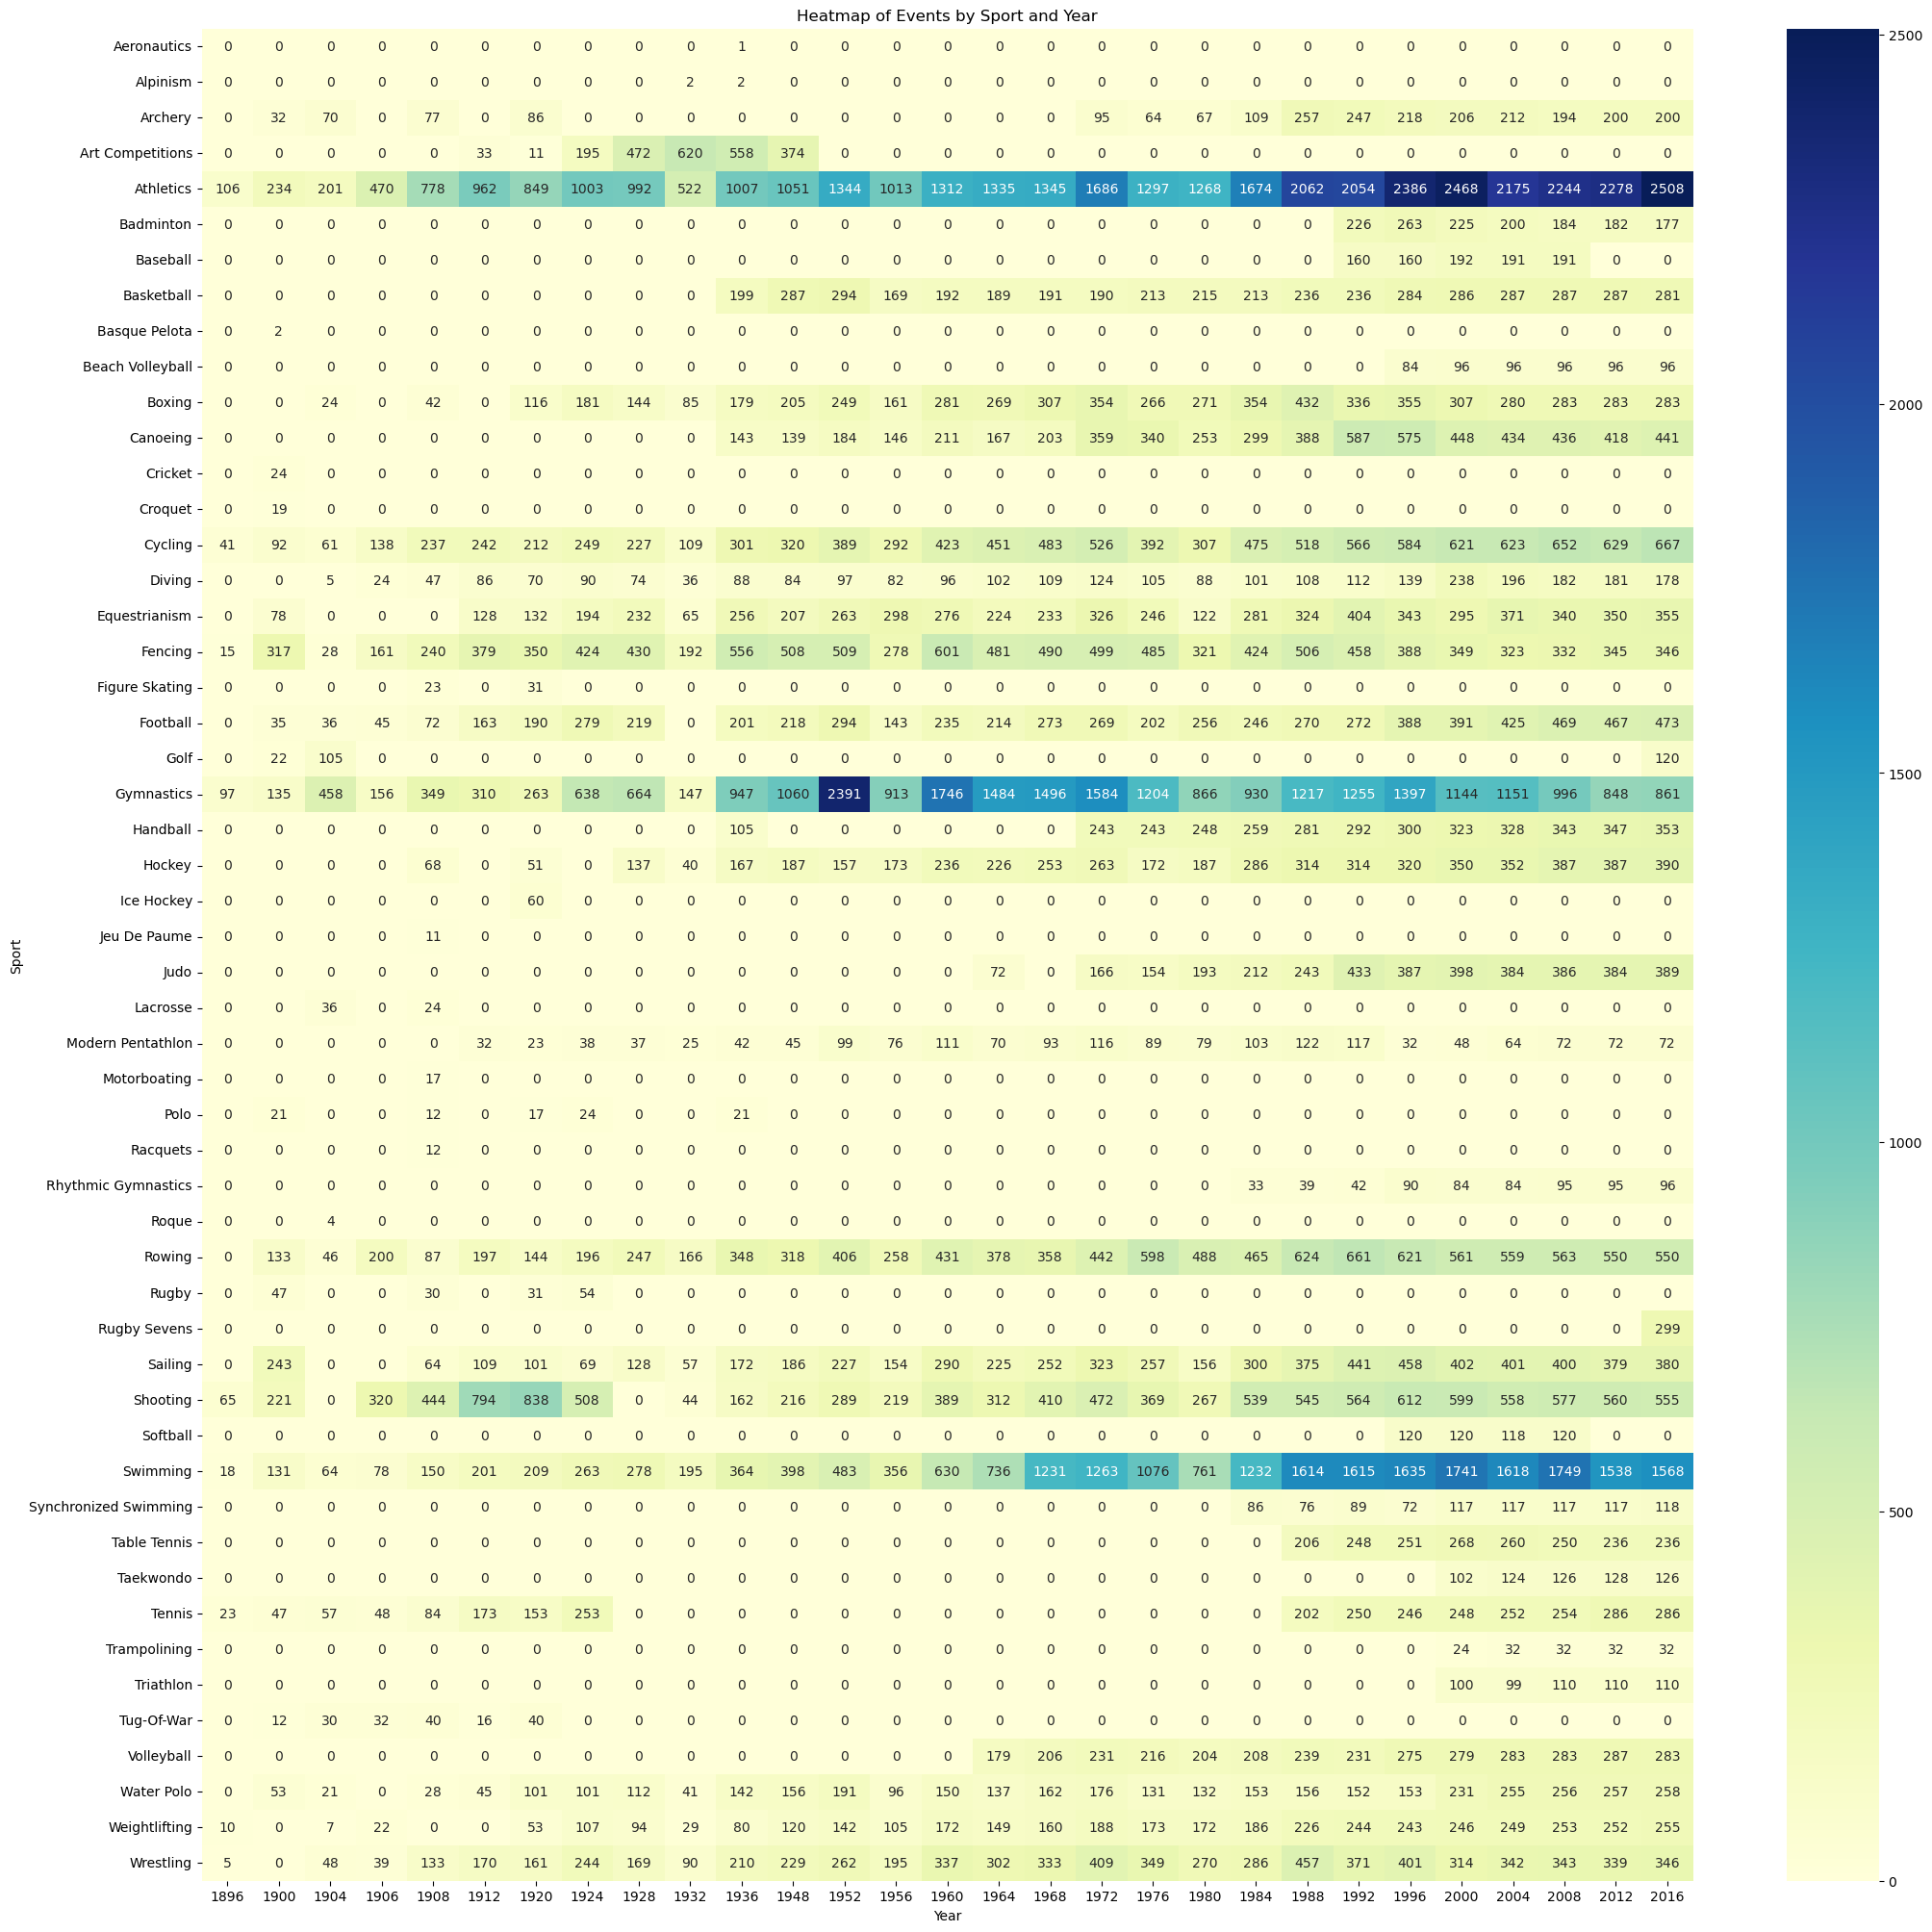

In [188]:
plt.figure(figsize=(25, 25))
heatmap_data = x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Events by Sport and Year")
plt.show()

In [189]:
x= df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

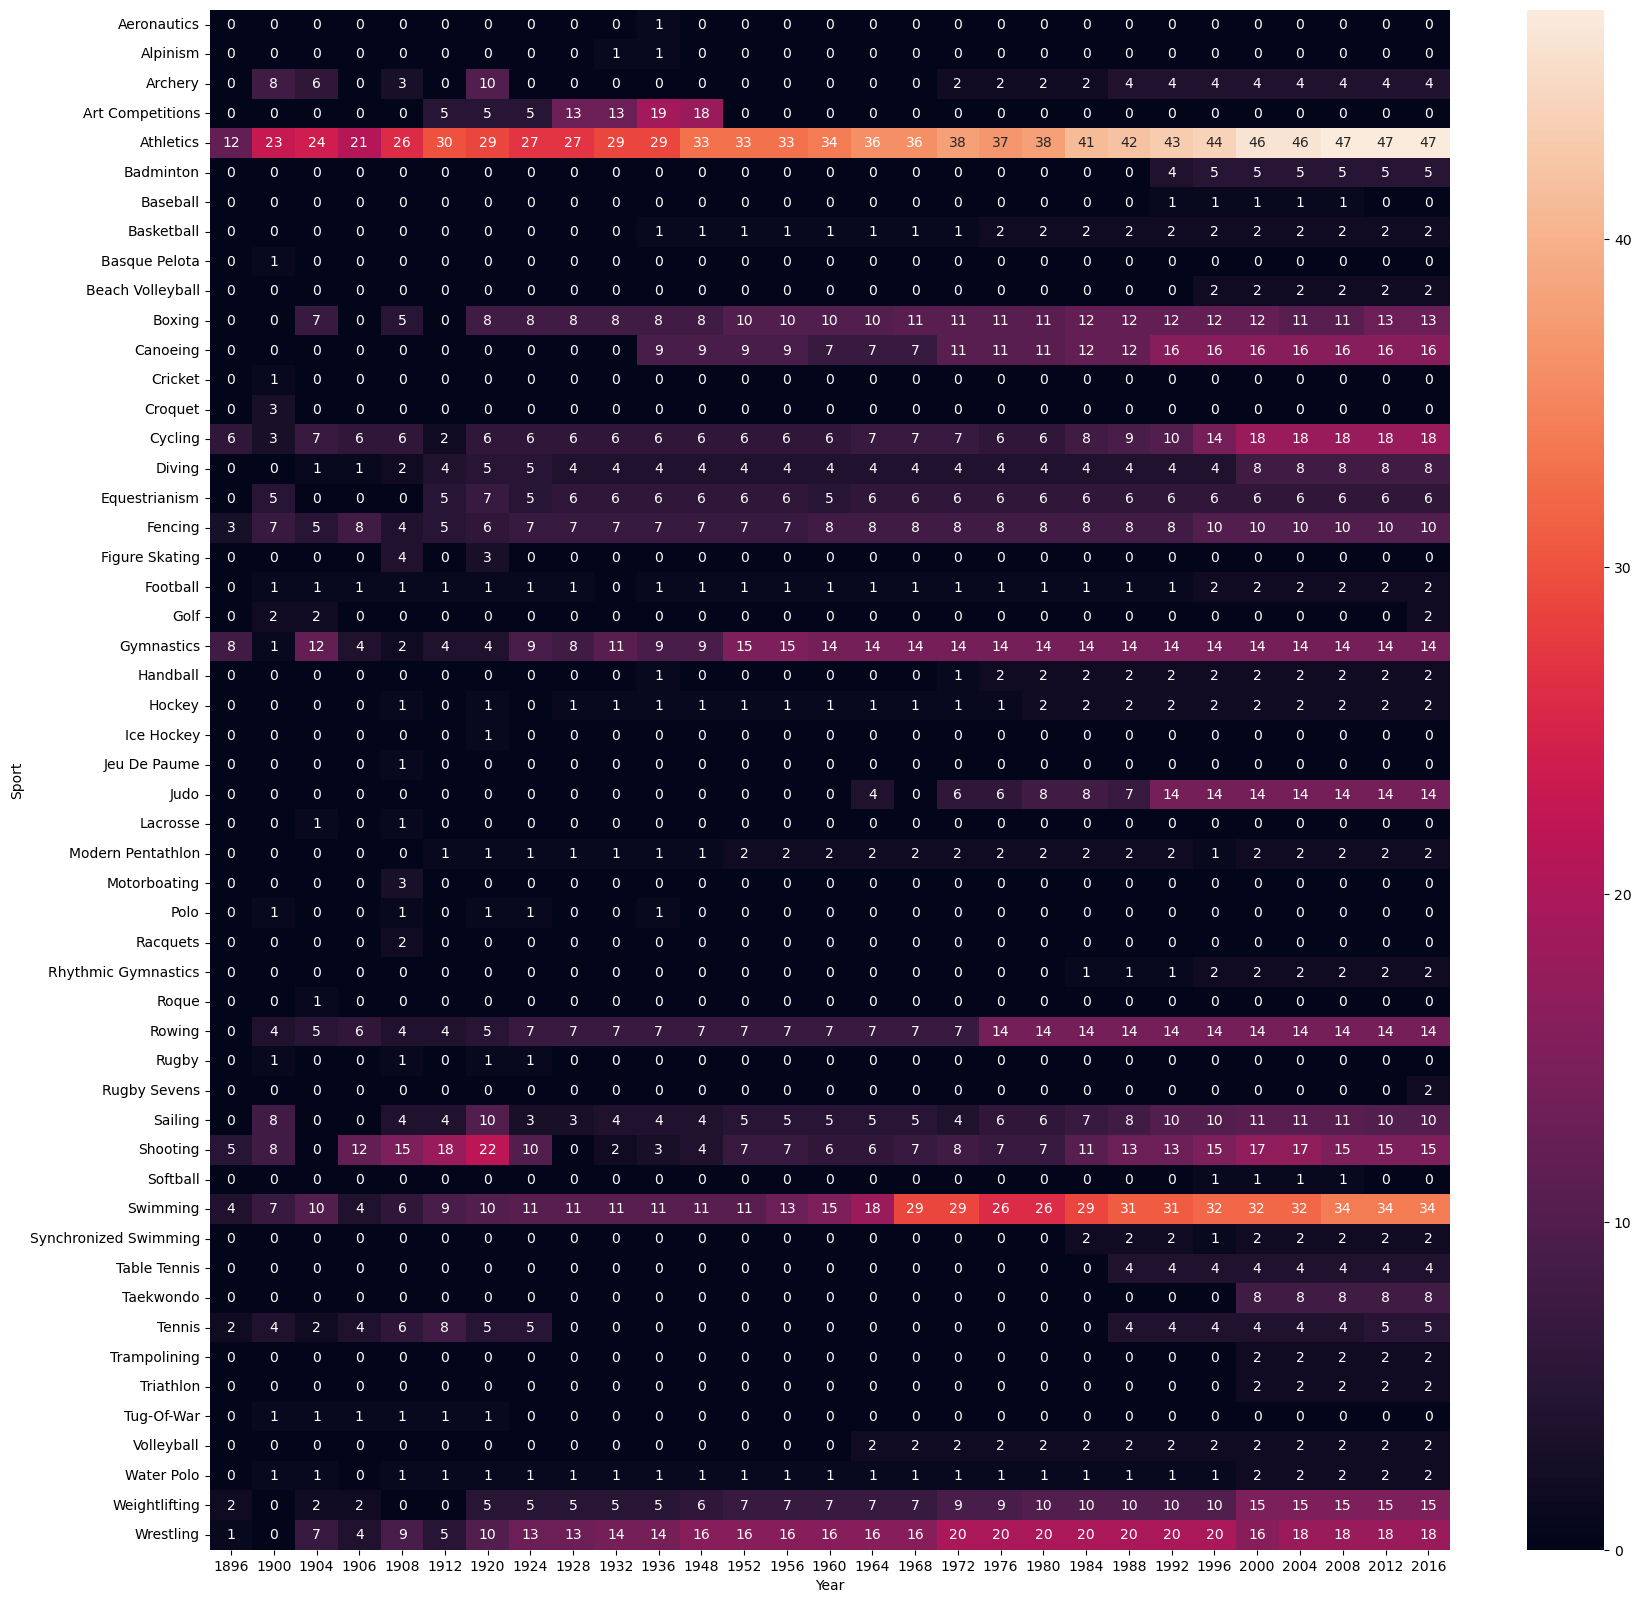

In [190]:
#events on particular sports
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [191]:
name_counts = df.dropna(subset=['Medal'])['Name'].value_counts().reset_index()

In [192]:
name_counts.columns = ['Name', 'Medal_Count']

In [193]:
merged_data = name_counts.merge(df, left_on='Name', right_on='Name', how='left')

In [194]:
result = merged_data[['Name', 'Sport', 'region']].drop_duplicates('Name').head(10)

In [196]:
#successfull athlete
print(result)


                                                Name       Sport   region
0                            Michael Fred Phelps, II    Swimming      USA
30                Larysa Semenivna Latynina (Diriy-)  Gymnastics   Russia
49                      Nikolay Yefimovich Andrianov  Gymnastics   Russia
73                       Borys Anfiyanovych Shakhlin  Gymnastics   Russia
97                                       Takashi Ono  Gymnastics    Japan
130                              Edoardo Mangiarotti     Fencing    Italy
144             Dara Grace Torres (-Hoffman, -Minas)    Swimming      USA
157                          Aleksey Yuryevich Nemov  Gymnastics   Russia
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    Swimming      USA
195                           Birgit Fischer-Schmidt    Canoeing  Germany


In [197]:
df.dropna(subset=['Medal'], inplace=True)


In [198]:
def most_successful(df, Sport):
    # Drop rows where 'Medal' is NaN
    temp_df = df.dropna(subset=['Medal'])
    
    # Filter by 'Sport' if it's not 'Overall'
    if Sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == Sport]
    
    # Get value counts of 'Name' column, reset index, and limit to top 15
    success_counts = temp_df['Name'].value_counts().reset_index()
    success_counts.columns = ['Name', 'Medal Count']  # Rename columns for clarity
    
    # Merge with the original dataframe to get the corresponding details
    result = success_counts.head(15).merge(df, left_on='Name', right_on='Name', how='left')
    
    # Drop duplicate rows based on 'Name' and return the result
    x =result[['Name', 'Medal Count', 'Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'index':'Name','Name_x' : 'Medals'},inplace= True)
    return x
# Example usage:
most_successful(df, 'Overall')


,Name,Medal Count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
28,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
46,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
61,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
74,Takashi Ono,13,Gymnastics,Japan
87,Edoardo Mangiarotti,13,Fencing,Italy
100,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
112,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
124,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
136,Birgit Fischer-Schmidt,12,Canoeing,Germany


# Country Wise (Analysis)
# Countrywise medal tally per year(line plot)
# What country are good at heatmap
# Most successful athlete (Top 10)

In [62]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [63]:
new_df= temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [64]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()


<Axes: xlabel='Year', ylabel='Sport'>

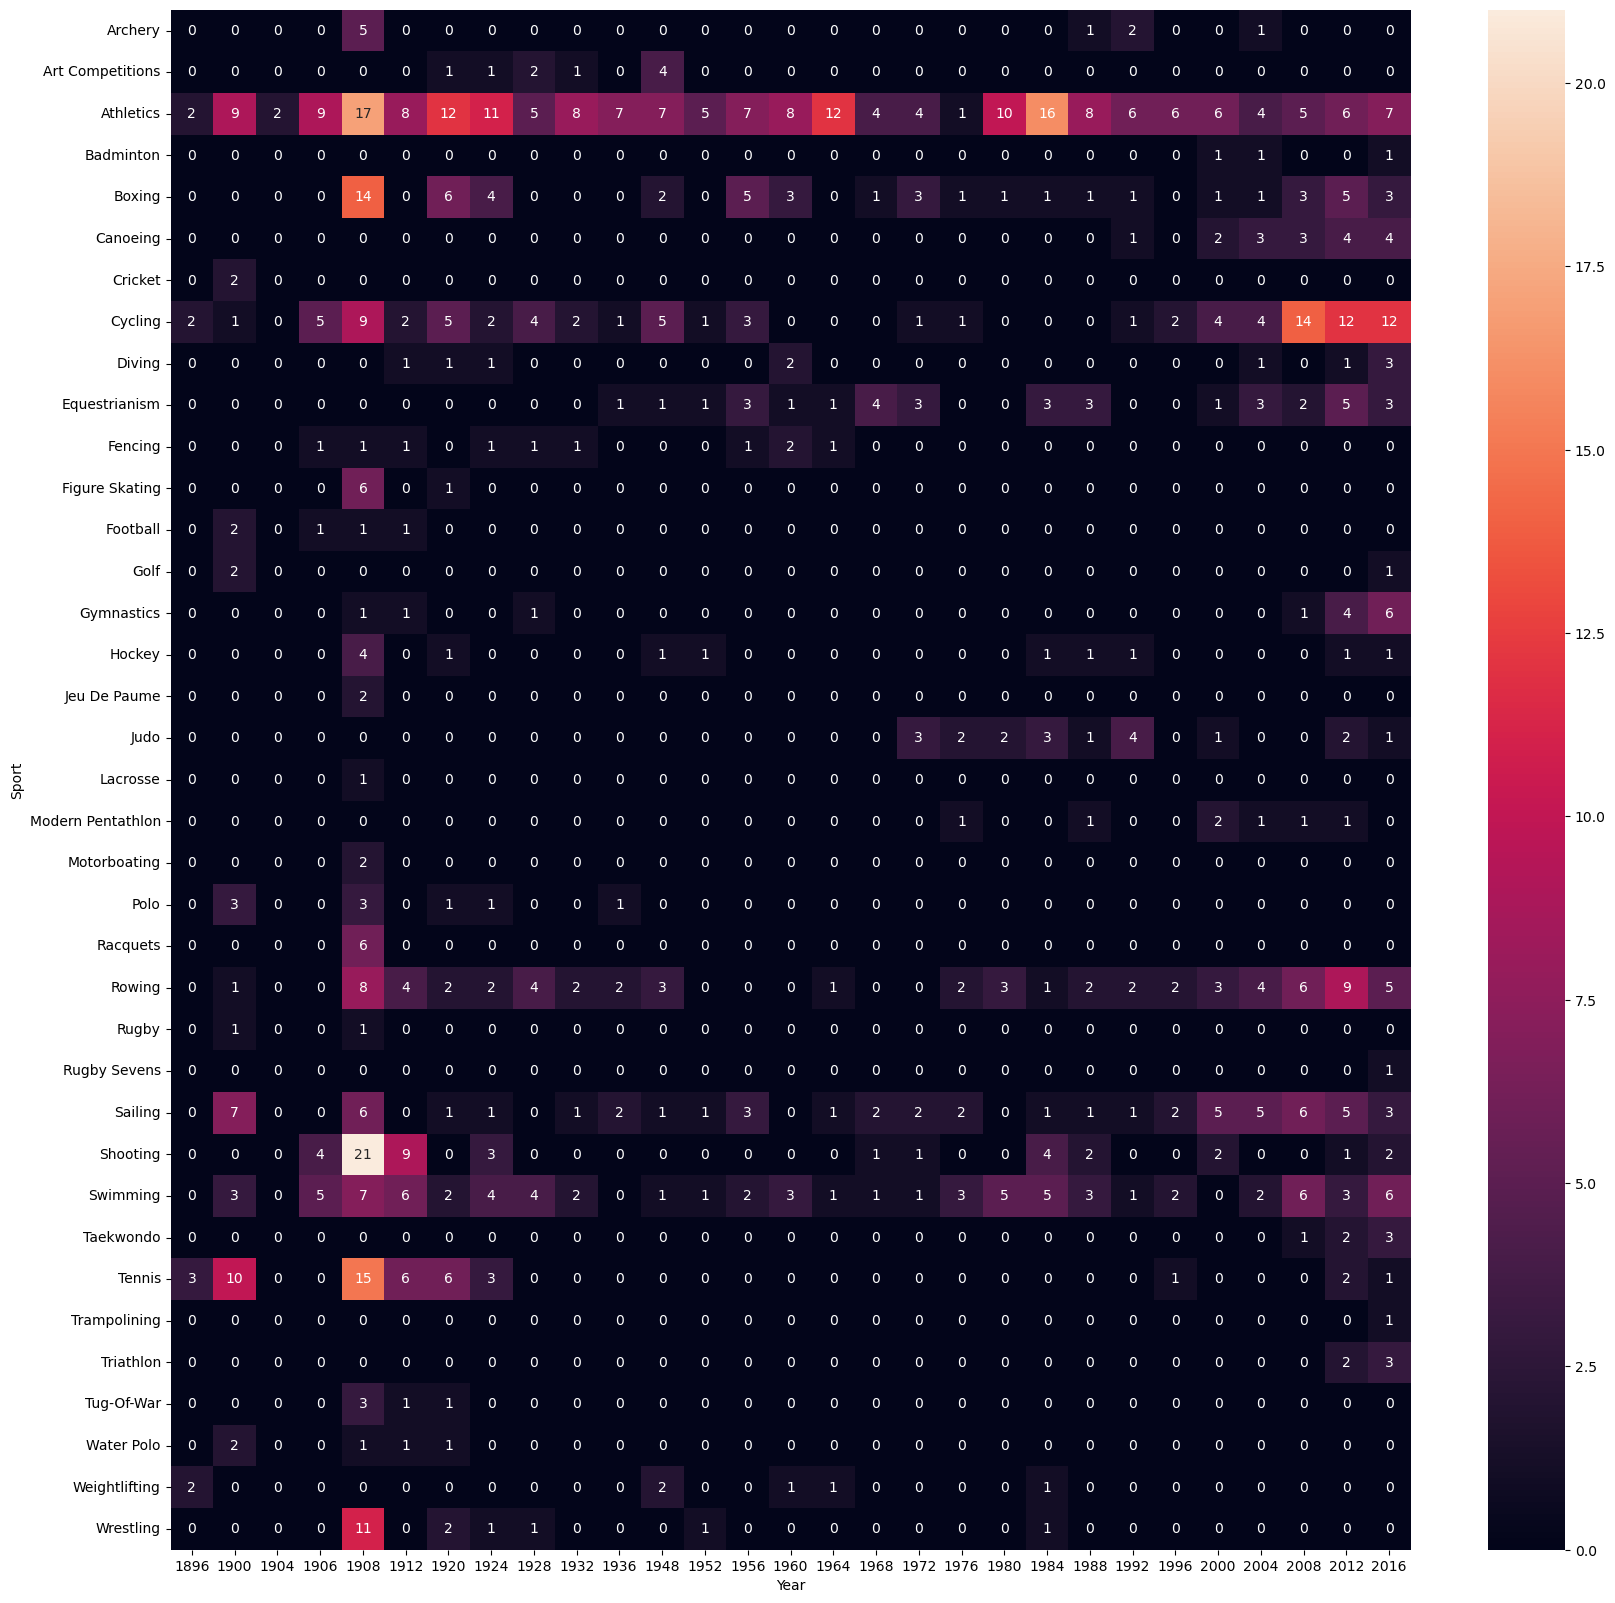

In [65]:
#which country good in which sport
new_df= temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [66]:
def most_successful(df, country):
    # Drop rows where 'Medal' is NaN
    temp_df = df.dropna(subset=['Medal'])
   
    temp_df = temp_df[temp_df['region'] == country]
    
    # Get value counts of 'Name' column, reset index, and limit to top 15
    success_counts = temp_df['Name'].value_counts().reset_index()
    success_counts.columns = ['Name', 'Medal Count']  # Rename columns for clarity
    
    # Merge with the original dataframe to get the corresponding details
    result = success_counts.head(15).merge(df, left_on='Name', right_on='Name', how='left')
    
    # Drop duplicate rows based on 'Name' and return the result
    x =result[['Name', 'Medal Count', 'Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'index':'Name','Name_x' : 'Medals'},inplace= True)
    return x
# Example usage:
most_successful(df, 'Overall')


,Name,Medal Count,Sport,region


In [67]:
most_successful(df,'India')

,Name,Medal Count,Sport,region
0,Udham Singh Kular,4,Hockey,India
4,Leslie Walter Claudius,4,Hockey,India
8,Shankar Pillay Laxman,3,Hockey,India
11,Ranganathan Francis,3,Hockey,India
14,Richard James Allen,3,Hockey,India
17,Balbir Singh,3,Hockey,India
20,Harbinder Singh Chimni,3,Hockey,India
23,"Balbir Singh Dosanjh, Sr.",3,Hockey,India
26,"Victor John ""V. J."" Peter",3,Hockey,India
29,Dhyan Chand Bais,3,Hockey,India


In [68]:
import plotly.figure_factory as ff

In [69]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [70]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [71]:
fig =ff.create_distplot([x1,x2,x3,x4],['Overall','Gold medalist','Silver medalist','Bronze medalist'],show_hist=False,show_rug=False)
fig.show()

In [72]:
famous_sports = [
    'Basketball', 'Judo', 'Football', 'Tug of war', 'Athletics',
    'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
    'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
    'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Shooting',
    'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
    'Tennis', 'Golf', 'Softball', 'Archery', 'Volleyball',
    'Synchronized Swimming', 'Table Tennis', 'Baseball',
    'Rhythmic Gymnastics', 'Rugby Sevens', 
    'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey'
]


In [73]:
famous_sports

['Basketball',
 'Judo',
 'Football',
 'Tug of war',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Polo',
 'Ice Hockey']

In [74]:
import plotly.figure_factory as ff

x = []  # To store the list of ages for each sport
name = []  # To store the sport names

# Loop through each sport and collect gold medalist ages
for sport in famous_sports:
    # Filter the data for the current sport
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    
    # Filter for gold medalists and get their ages
    gold_ages = temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna()
    
    # Append data to lists only if gold_ages is not empty
    if not gold_ages.empty:
        x.append(gold_ages.tolist())  # Convert to a list for the distplot
        name.append(sport)

# Ensure there is data to plot
if x:
    # Create the distribution plot
    fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
    fig.show()
else:
    print("No data available for gold medalist age distributions.")


In [75]:
famous_sports

['Basketball',
 'Judo',
 'Football',
 'Tug of war',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Polo',
 'Ice Hockey']

In [76]:
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [77]:
athlete_df['Medal'].fillna('No medal',inplace=True)

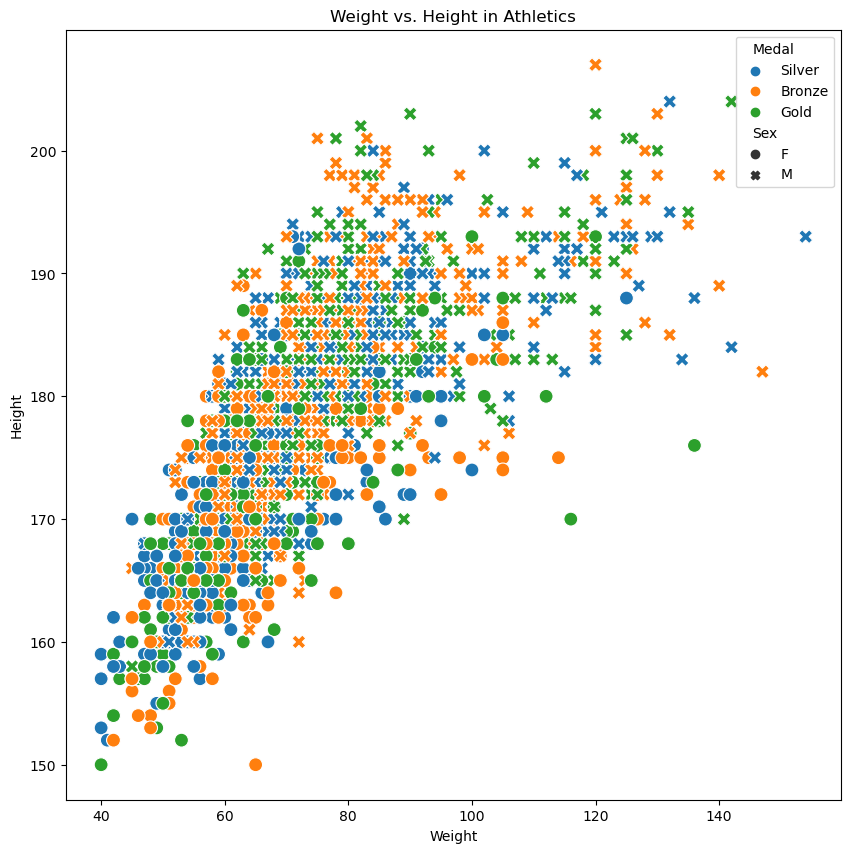

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 10))

# Filter data for Athletics
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']

# Create the scatter plot
sns.scatterplot(
    x='Weight', 
    y='Height', 
    hue='Medal', 
    style='Sex', 
    s=100, 
    data=temp_df
)

# Add title and show the plot
plt.title('Weight vs. Height in Athletics')
plt.show()


In [79]:
# Filter data for male and female athletes (assuming 'sex' is the correct column)
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

# Merge male and female athlete data on Year
final = men.merge(women, on="Year", suffixes=('_Male', '_Female'))

# Rename columns for clarity
final.rename(columns={'Name_Male': 'Male', 'Name_Female': 'Female'}, inplace=True)

# Create a line plot using Plotly
import plotly.express as px

fig = px.line(final, x="Year", y=["Male", "Female"], labels={'value': 'Count', 'variable': 'Gender'})
fig.show()


In [80]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [81]:
# Function to prepare data for a specific country
def prepare_country_medal_data(df, country):
    """
    Groups medal data by year for a specific country and calculates gold medals per year.
    """
    country_df = df[df['region'] == country]
    medal_data = country_df.groupby('Year').sum()['Gold'].reset_index()
    return medal_data

In [82]:
# Prepare data
country = "India"  # Change this to explore other countries
medal_data = prepare_country_medal_data(df, country)


In [83]:
# Create features (Years) and labels (Gold medals)
X = medal_data['Year'].values.reshape(-1, 1)
y = medal_data['Gold'].values


In [84]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Polynomial Regression (degree=3)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [86]:
# Predict using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)


In [87]:
# Evaluate Linear Regression
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))


Linear Regression:
Mean Squared Error: 150.05731737129292
R2 Score: -2.878702872278977


In [88]:
# Evaluate Polynomial Regression
print(f"Polynomial Regression (Degree {degree}):")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))

Polynomial Regression (Degree 3):
Mean Squared Error: 218.23446480010747
R2 Score: -4.640955471408271


In [89]:
# Visualize both regressions
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

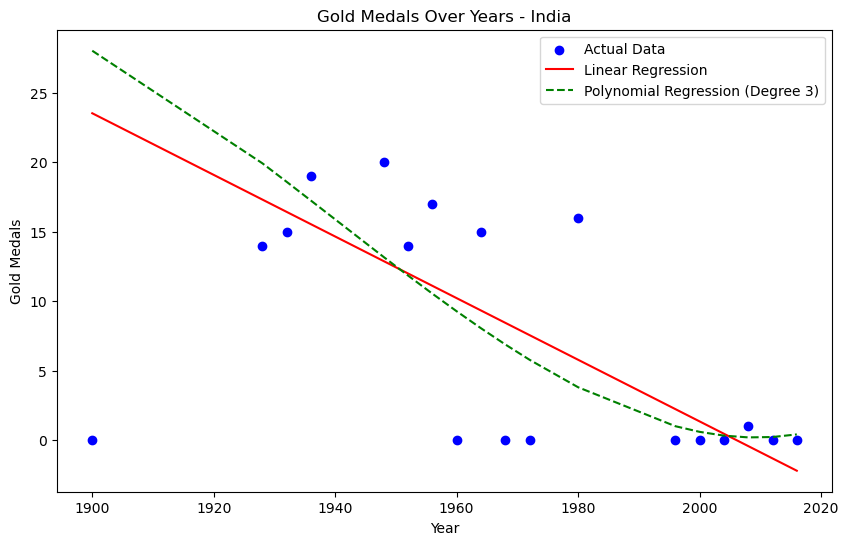

In [90]:
# Visualize both regressions
plt.figure(figsize=(10, 6))

# Actual Data (scatter plot)
plt.scatter(X, y, color='blue', label='Actual Data')

# Linear Regression Line
if len(X) > 0:  # Ensure X is not empty
    plt.plot(X, linear_model.predict(X), color='red', label='Linear Regression')

# Polynomial Regression Curve
if len(X) > 0:  # Ensure X is not empty
    plt.plot(X, poly_model.predict(X), color='green', linestyle='--', label=f'Polynomial Regression (Degree {degree})')

# Titles and labels
plt.xlabel('Year')
plt.ylabel('Gold Medals')
plt.title(f'Gold Medals Over Years - {country}')
plt.legend()  # Ensure every plotted element has a label
plt.show()


Random Forest Regression:
Mean Squared Error: 118.89670000000001
R2 Score: -2.0732588045234253


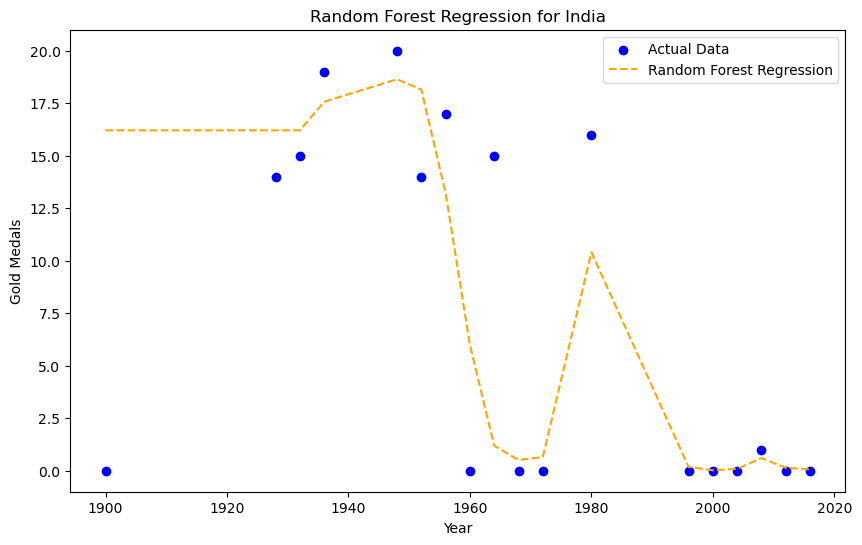

In [92]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Visualize Random Forest Predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, rf_model.predict(X), color='orange', label='Random Forest Regression', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Gold Medals')
plt.title(f'Random Forest Regression for {country}')
plt.legend()
plt.show()


In [93]:
# Models to Compare 
models = {
    "Linear Regression": linear_model,
    "Polynomial Regression": poly_model,
    "Random Forest Regression": rf_model,
    
}

# Initialize a results dictionary
results = {}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}

# Display Results in Tabular Format
print(f"{'Model':<30} {'MSE':<20} {'R2 Score':<20}")
print("-" * 70)
for name, metrics in results.items():
    print(f"{name:<30} {metrics['MSE']:<20.4f} {metrics['R2 Score']:<20.4f}")


Model                          MSE                  R2 Score            
----------------------------------------------------------------------
Linear Regression              150.0573             -2.8787             
Polynomial Regression          218.2345             -4.6410             
Decision Tree Regression       121.7500             -2.1470             
Random Forest Regression       118.8967             -2.0733             


In [108]:
from sklearn.impute import SimpleImputer

# Initialize the imputer to replace NaN values with the column mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer and transform the features
X_imputed = imputer.fit_transform(X)  # Assuming X contains the features like 'Age', 'Height', etc.

# Now, X_imputed will have no missing values, and you can proceed with model training.


In [109]:
# Check for missing values
print(X.isnull().sum())  # Check if any columns have missing values


Age        717
Height    7979
Weight    8479
Year         0
dtype: int64


In [110]:
# Split the data into features and target for binary classification
from sklearn.model_selection import train_test_split

# Features (e.g., Age, Height, Weight, Year)
X = df[['Age', 'Height', 'Weight', 'Year']]

# Binary Classification Target: Whether a medal is won (1 for won, 0 for no medal)
y_binary = df['Medal']

# Multi-Class Classification Target: Type of medal (Gold, Silver, Bronze, None)
y_multi = df['Medal']

# Split the data for binary classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Split the data for multi-class classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.2, random_state=42)


In [111]:
# Drop rows with any missing values
df_clean = df.dropna()

# Re-define X and y based on the cleaned data
X_clean = df_clean[['Age', 'Height', 'Weight', 'Year']]
y_binary_clean = df_clean['Medal']

# Re-split the cleaned data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_clean, y_binary_clean, test_size=0.2, random_state=42)

# Train Logistic Regression Model
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_bin, y_train_bin)

# Predictions and Evaluation
y_pred_logreg = logreg_classifier.predict(X_test_bin)
print("Logistic Regression Binary Classification Accuracy:", accuracy_score(y_test_bin, y_pred_logreg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test_bin, y_pred_logreg))


Logistic Regression Binary Classification Accuracy: 0.4235294117647059
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

      Bronze       0.50      0.48      0.49        27
        Gold       0.30      0.10      0.15        30
      Silver       0.41      0.71      0.52        28

    accuracy                           0.42        85
   macro avg       0.40      0.43      0.39        85
weighted avg       0.40      0.42      0.38        85



In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and test sets again after imputing missing values
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_imputed, y_binary, test_size=0.2, random_state=42)

# Train Logistic Regression Model
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_bin, y_train_bin)

# Predictions
y_pred_logreg = logreg_classifier.predict(X_test_bin)

# Evaluate Model
print("Logistic Regression Binary Classification Accuracy:", accuracy_score(y_test_bin, y_pred_logreg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test_bin, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test_bin, y_pred_logreg)
print("Confusion Matrix (Logistic Regression):\n", cm_logreg)



Logistic Regression Binary Classification Accuracy: 0.34242957746478875
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

      Bronze       0.35      0.40      0.38      2277
        Gold       0.34      0.50      0.41      2301
      Silver       0.32      0.12      0.17      2238

    accuracy                           0.34      6816
   macro avg       0.34      0.34      0.32      6816
weighted avg       0.34      0.34      0.32      6816

Confusion Matrix (Logistic Regression):
 [[ 920 1098  259]
 [ 851 1151  299]
 [ 851 1124  263]]


In [113]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifier for Multi-Class Classification
dt_classifier_multi = DecisionTreeClassifier(random_state=42)
dt_classifier_multi.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_dt_multi = dt_classifier_multi.predict(X_test_multi)

# Evaluate Model
print("Decision Tree Multi-Class Accuracy:", accuracy_score(y_test_multi, y_pred_dt_multi))
print("Classification Report (Decision Tree Multi-Class):\n", classification_report(y_test_multi, y_pred_dt_multi))

# Confusion Matrix
cm_dt_multi = confusion_matrix(y_test_multi, y_pred_dt_multi)
print("Confusion Matrix (Decision Tree Multi-Class):\n", cm_dt_multi)


Decision Tree Multi-Class Accuracy: 0.346537558685446
Classification Report (Decision Tree Multi-Class):
               precision    recall  f1-score   support

      Bronze       0.34      0.43      0.38      2277
        Gold       0.37      0.37      0.37      2301
      Silver       0.33      0.24      0.28      2238

    accuracy                           0.35      6816
   macro avg       0.35      0.35      0.34      6816
weighted avg       0.35      0.35      0.34      6816

Confusion Matrix (Decision Tree Multi-Class):
 [[968 749 560]
 [921 848 532]
 [977 715 546]]


In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into train and test sets again after imputing missing values
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_imputed, y_multi, test_size=0.2, random_state=42)

# Train KNN Classifier for Multi-Class Classification
knn_classifier_multi = KNeighborsClassifier(n_neighbors=5)  # Choose the value of k
knn_classifier_multi.fit(X_train_multi, y_train_multi)

# Predictions
y_pred_knn_multi = knn_classifier_multi.predict(X_test_multi)

# Evaluate Model
print("KNN Multi-Class Accuracy:", accuracy_score(y_test_multi, y_pred_knn_multi))
print("Classification Report (KNN Multi-Class):\n", classification_report(y_test_multi, y_pred_knn_multi))

# Confusion Matrix
cm_knn_multi = confusion_matrix(y_test_multi, y_pred_knn_multi)
print("Confusion Matrix (KNN Multi-Class):\n", cm_knn_multi)


KNN Multi-Class Accuracy: 0.35460680751173707
Classification Report (KNN Multi-Class):
               precision    recall  f1-score   support

      Bronze       0.35      0.48      0.41      2277
        Gold       0.37      0.37      0.37      2301
      Silver       0.34      0.21      0.26      2238

    accuracy                           0.35      6816
   macro avg       0.35      0.35      0.34      6816
weighted avg       0.35      0.35      0.35      6816

Confusion Matrix (KNN Multi-Class):
 [[1095  733  449]
 [ 990  857  454]
 [1033  740  465]]
